<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/imagePRocessing_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic 
**read / present / what is an image for us?**

[Text(0.5, 1.0, 'Pillow')]

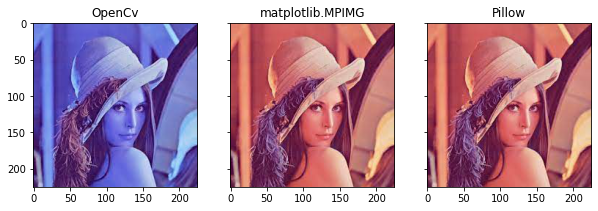

In [1]:
# ...... 
# ..................
# READ and SHOW ....   
# ..................
# ...... ```````````
import numpy as np
# ````````````````````````````````````````````````````````````````````````````
# we need to open an image
# this work has at least 3 ways to look at it. i know 3 way, maybe it has more !

Image_Path =  'drive/MyDrive/1.jpg'
import cv2
img0 = cv2.imread(Image_Path)
# it returns a tensor wuth shape(row_pixel, columns_pixel, Depth or GrayLevel)
# because cv2 is heavy to use. someTimes better to use matolitlib
# it works like cv2
# dont use multiple method to open. i do that, My troubles began
# ````````````````````````````````````````````````````````````````````````````
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
img1 = mpimg.imread(Image_Path)
# ````````````````````````````````````````````````````````````````````````````
from PIL import Image
img2 = Image.open(Image_Path)
# it returns PIL.JpegImagePlugin.JpegImageFile
# we can convert it to array use 
# it used in tkinter. The fact that images become object is an advantage but bot raw
arr = np.asarray(img2)

# ````````````````````````````````````````````````````````````````````````````
# want to see them ?

figure,ax = plt.subplots(nrows = 1, ncols = 3, sharey=True,figsize =(10,10))
ax[0].imshow(img0); ax[0].set(title = 'OpenCv')
ax[1].imshow(img1); ax[1].set(title = 'matplotlib.MPIMG')
ax[2].imshow(img2); ax[2].set(title = 'Pillow')

# Why does opencv open images in such way ? tis is BGR instead RGB color space

# TODO : explain (BGR) and (gray) image. website

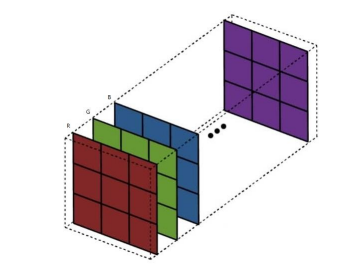

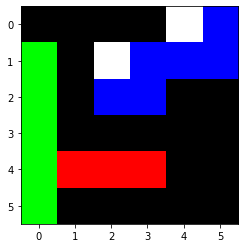

shape: (6, 6, 3) 
 blue matrix
[[  0   0   0   0 255 255]
 [  0   0 255 255 255 255]
 [  0   0 255 255   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]        
green matrix
[[  0   0   0   0 255   0]
 [255   0 255   0   0   0]
 [255   0   0   0   0   0]
 [255   0   0   0   0   0]
 [255   0   0   0   0   0]
 [255   0   0   0   0   0]]
eed matrix
[[  0   0   0   0 255   0]
 [  0   0 255   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0 255 255 255   0   0]
 [  0   0   0   0   0   0]]


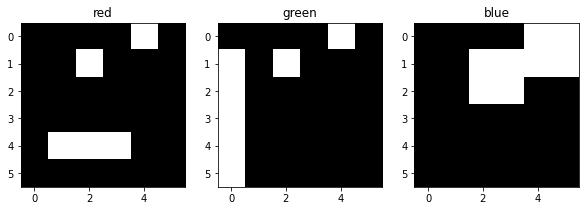

In [2]:
# what is a digital image?
# it is a tensor of rank 3
# it contain 3 matrix 
# each matrices for certain color. red green blue RGB
vsi = mpimg.imread('drive/MyDrive/vsi.jpg') # very simple image
plt.imshow(vsi)
plt.show()
print(f'shape: {vsi.shape} \n blue matrix\n{vsi[:,:,2]} \
       \ngreen matrix\n{vsi[:,:,1]}\need matrix\n{vsi[:,:,0]}')
# each image matrix values 0 to 255
# 0 to black
# 255 The maximum amount of color 
# if in 3 matrix some pixle has 255 for every color it become white
colorr = ['red', 'green', 'blue']
fig,ax =plt.subplots(1,3,figsize = (10,10))
for i in range(3):
  ax[i].imshow(vsi[:,:,i],cmap = 'gray')
  ax[i].set(title = colorr[i])

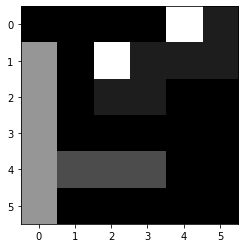

[[  0   0   0   0 255  29]
 [150   0 255  29  29  29]
 [150   0  29  29   0   0]
 [150   0   0   0   0   0]
 [150  76  76  76   0   0]
 [150   0   0   0   0   0]]
(6, 6)


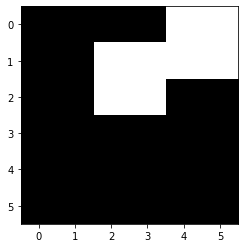

In [4]:
# ..................
# GRAY IMAGES ......  
# ..................
# OPENcv
# Convert image into one matrix. Once done, images become easier to work with
vsi = cv2.imread('drive/MyDrive/vsi.jpg')

gray = cv2.cvtColor(vsi, cv2.COLOR_BGR2GRAY)  # cv2. cvtColor() method is used to convert an image from one color space to another.
# a color space is a range of colors on a spectrum that can be interpreted and displayed on a visual plane.
# popular color space : RGB / CMY’K / Y’UV / HSV
plt.imshow(gray, cmap ='gray');plt.show()

print(gray,gray.shape, sep = '\n')


# or make it by hand
vsi_g = np.array(vsi[:,:,0]) # but it is creepy just blue
plt.imshow(vsi_g, cmap ='gray');plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


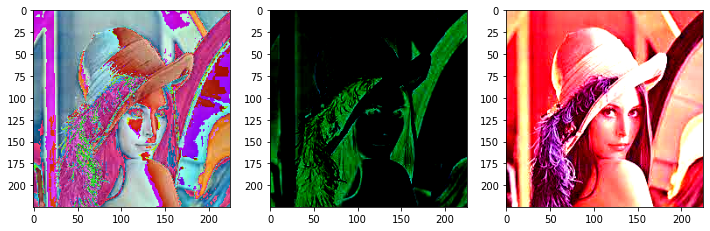

In [ ]:
# play with image array 
import cv2
import numpy as np
import matplotlib.pyplot as plt
Image_Path =  'drive/MyDrive/1.jpg'

img0 = cv2.imread(Image_Path)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

transform0 = img0 * 2
transform1 = np.empty(img0.size)
for i,j in enumerate(img0):
  transform1[j-1] = int(i * 5)

fig,ax = plt.subplots(1,3,figsize = (12,12))
ax[0].imshow(transform0)

#Linear filter
def filtering(img,k,l):
    img=np.asarray(img,dtype=np.float)
    img=img*k+l
    img[img>255]=255
    img[img<0]=0
    return np.asarray(img,dtype=np.int)
transform1 = filtering(img0, -3, +200)
ax[1].imshow(transform1)
filtered_image = filtering(img0, 3, -200)
ax[2].imshow(filtered_image)
plt.show()


features

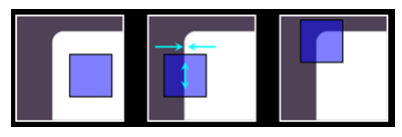



In [ ]:
# ..................
#  features .... ...  
# ..................

# Features are parts of an image (or any data) that have the same properties
# for example : LINE , CORNER , Background , color , objects   of an images is the feature



____
 feature  extraction algorithms <<<

# 1 - corner harris 



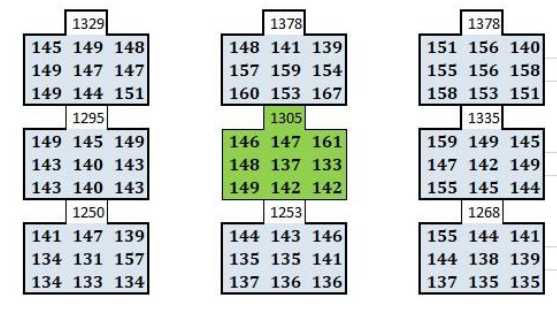

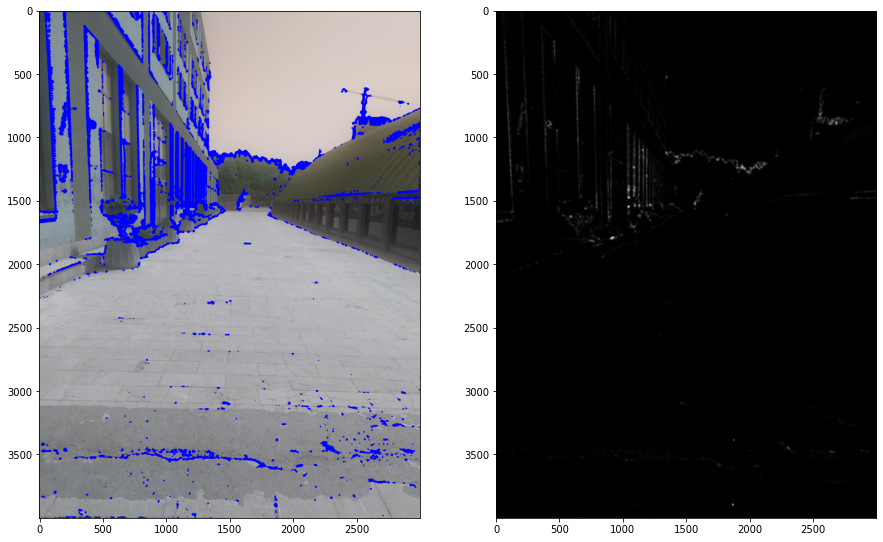

In [ ]:
# Harris Corner detector is used to extract corners from grayscale images.
# a window from pixle selected and sum of them comprise with eight neighbor window
# If sums are equal  - > they background 
# Equals in one direction - > in that direction we have edge 
# In case of more than one direction change - > we have a corner
# https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
import numpy as np
import cv2
import matplotlib.pyplot as plt
ak = cv2.imread('drive/MyDrive/AK.jpg')

gray = cv2.cvtColor(ak,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,15,1,0.0001)  #(src, window, ksize,)
# The k parameter lets you influence in the step,trading off precision and recall. 
# So with a bigger k, you will get less false corners but you will also miss more real corners (high precision), with a smaller k you will get a lot more corners, so you will miss less true corners, but get a lot of false ones (high recall).
dst = cv2.dilate(dst,None)
ak[dst>0.01*dst.max()]=[0,0,255]

fig, ax = plt.subplots(1,2,figsize = (15,15))
ax[0].imshow(ak)
ax[1].imshow(dst,cmap = 'gray')
plt.show()

---------
Features from accelerated segment test (FAST)

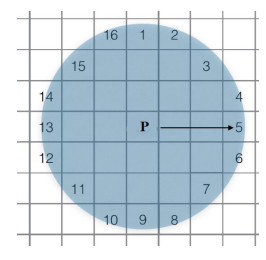

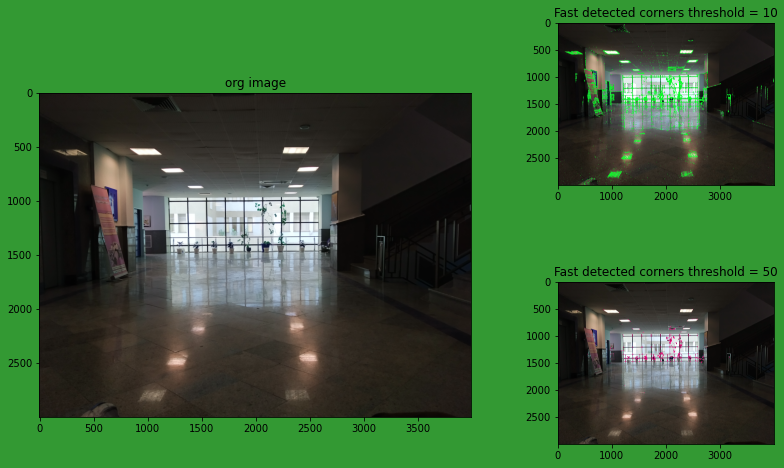

In [ ]:
# Analyzes the p pixel based on 16 neighbor pixels
# set a threshold as T
# when neighbor greater than p + T -> it is considered white
# and when neighbor lower than p - T -> it is considered black
# when p considered a corner that count of white and black neighbor greater than 12
ak = cv2.imread('drive/MyDrive/test.jpg')

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(0)

thresh = 50
fast.setThreshold(thresh)
kp = fast.detect(ak,None)
img2 = cv2.drawKeypoints(ak, kp, None, color=(255,0,125))

thresh1 = 10
fast.setThreshold(thresh1)
kp1 = fast.detect(ak,None)
img3 = cv2.drawKeypoints(ak, kp1, None, color=(10,255,40))


# -----------------------------------------------------------------------------
fig = plt.figure(figsize = (12,12)) ; fig.patch.set_facecolor('g') ; fig.patch.set_alpha(0.8)



ax1 = fig.add_axes([0,0,.5,.5])
ax1.imshow(ak),plt.title('org image')

ax2 = fig.add_axes([.6,0,.25,.25])
ax2.imshow(img2),plt.title('Fast detected corners threshold = 50')

ax3 = fig.add_axes([.6,.3,.25,.25])
ax3.imshow(img3),plt.title('Fast detected corners threshold = 10')

plt.show()

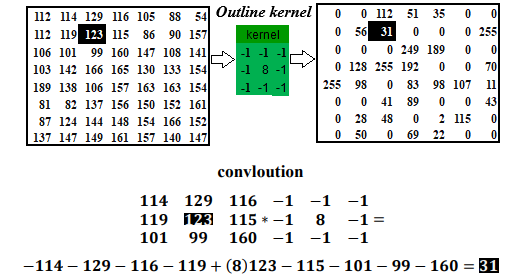

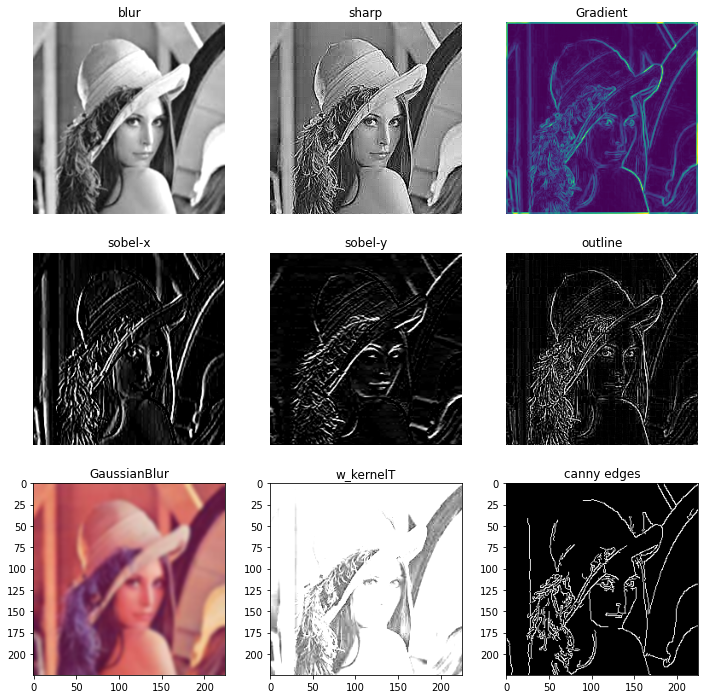

In [ ]:
# convolution
# a window has Created  and slide it through pixels of images
# that window called KERNEL

# A kernel is, as described earlier, a matrix of weights which are multiplied
# with the input to extract relevant features. The dimensions of the kernel matrix
# is how the convolution gets it’s name. For example, in 2D convolutions, the kernel matrix is a 2D matrix.

# A filter however is a concatenation of multiple kernels, each kernel assigned 
# to a particular channel of the input. Filters are always one dimension more
# than the kernels. For example, in 2D convolutions, filters are 3D matrices 
#(which is essentially a concatenation of 2D matrices i.e. the kernels).
# So for a CNN layer with kernel dimensions h*w and input channels k, the filter dimensions are k*h*w.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ak_bgr = cv2.imread('drive/MyDrive/1.jpg')

ak = cv2.imread('drive/MyDrive/1.jpg', 0)

# blur kernel
blur = np.array([
                        [.075, .15, .075],
                        [.15, .35, .15],
                        [.075, .15, .075]
                ])
blurT = cv2.filter2D(src=ak, ddepth=-1, kernel=blur)

# -----------------------------------------------------------------------------
# sharpen kernel
sharpen = np.array([
                          [0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]
                    ])
sharpenT = cv2.filter2D(src=ak, ddepth=-1, kernel=sharpen)

# -----------------------------------------------------------------------------
sobelGx = np.array([
                      [-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]
                      ])
sobelGxT = cv2.filter2D(src=ak, ddepth=-1, kernel=sobelGx)

# -----------------------------------------------------------------------------
sobelGy = np.array([
                      [1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]
                      ])
sobelGyT = cv2.filter2D(src=ak, ddepth=-1, kernel=sobelGy)

# -----------------------------------------------------------------------------
outline = np.array([
                      [-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]
                      ])
outlineT = cv2.filter2D(src=ak, ddepth=-1, kernel=outline)

# -----------------------------------------------------------------------------
w_kernel = np.array([
                      [0, 0, 0],
                      [0, 3, 0],
                      [0, 0, 0]
                      ])
w_kernelT = cv2.filter2D(src=ak, ddepth=-1, kernel=w_kernel)

# -----------------------------------------------------------------------------
# gradient
from scipy.signal import convolve2d

bw = ak_bgr.mean(axis=2)
w = np.zeros((img.shape[0], img.shape[1]))

Gx = convolve2d(bw, sobelGx)
Gy = convolve2d(bw, sobelGy)
G = np.sqrt((Gx * Gx) + (Gy * Gy))

# -----------------------------------------------------------------------------
from PIL import Image, ImageFilter

image = Image.open('drive/MyDrive/1.jpg')

# Blurring image by sending the ImageFilter.
# GaussianBlur predefined kernel argument / used for mois reduction, the image become smoother
image = image.filter(ImageFilter.GaussianBlur)
# -----------------------------------------------------------------------------
# Canny Edge Detection in OpenCV
# >> The Canny edge detector is an edge detection operator that uses a multi-stage 
# algorithm to detect a wide range of edges in images. It was developed by
# John F. Canny in 1986. Canny also produced a computational theory
# of edge detection explaining why the technique works.
edges = cv2.Canny(ak,500,100)



fig, ax = plt.subplots(3,3,figsize = (12,12))

ax[0,0].imshow(blurT, cmap = 'gray'); ax[0,0].title.set_text('blur'); ax[0,0].axis('off')
ax[0,1].imshow(sharpenT, cmap = 'gray'); ax[0,1].title.set_text('sharp'); ax[0,1].axis('off')
ax[1,0].imshow(sobelGxT, cmap = 'gray'); ax[1,0].title.set_text('sobel-x'); ax[1,0].axis('off')
ax[1,1].imshow(sobelGyT, cmap = 'gray'); ax[1,1].title.set_text('sobel-y'); ax[1,1].axis('off')
ax[1,2].imshow(outlineT, cmap = 'gray'); ax[1,2].title.set_text('outline'); ax[1,2].axis('off')
ax[0,2].imshow(G); ax[0,2].title.set_text('Gradient'); ax[0,2].axis('off')
ax[2,0].imshow(image, cmap = 'gray'); ax[2,0].title.set_text('GaussianBlur'); ax[1,2].axis('off')
ax[2,1].imshow(w_kernelT, cmap = 'gray'); ax[2,1].title.set_text('w_kernelT'); ax[1,2].axis('off')
ax[2,2].imshow(edges, cmap = 'gray'); ax[2,2].title.set_text('canny edges'); ax[1,2].axis('off')

plt.show()

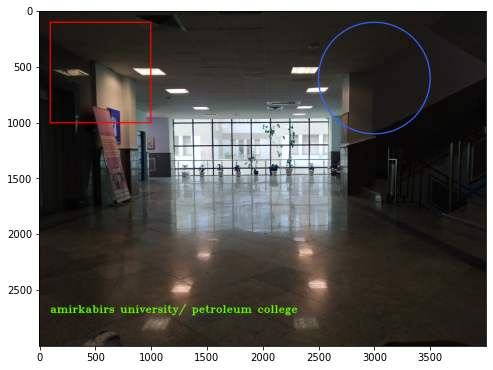

In [ ]:
# sometimes we need annotate an image with a shape or/and text
img1 = cv2.imread('drive/MyDrive/test.jpg')

# # draw rectangle
cv2.rectangle(img1, pt1=(100,100), pt2=(1000,1000), color=(255,0,0), thickness=10)

# text
cv2.putText(img=img1, text='amirkabirs university/ petroleum college', org=(100, 2700),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(100, 255, 0),thickness=5)

# circle
cv2.circle(img1, (3000, 600), radius = 500, color = (50, 100, 255), thickness=10)

plt.figure(figsize = (8,8))
plt.imshow(img1)
plt.show()

-------
-------
# to be continued  . . . 
------
------

homography

augmentation 

use machin learning on Images

annotate with xml files

make dataset

sequental neural network

Cnn neural netwoek 

localized and segmentation

object detection

how human eye work and how brain process a light signal 


>>>> Computer Vision 
